In [ ]:
!pip install cellpose

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 131.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━



Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.6 
platform:       	linux 
python version: 	3.11.13 
torch version:  	2.6.0+cu124! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 


Mounted at /content/drive


100%|██████████| 1.15G/1.15G [00:05<00:00, 218MB/s]
Processing:   0%|          | 0/9 [00:00<?, ?it/s]

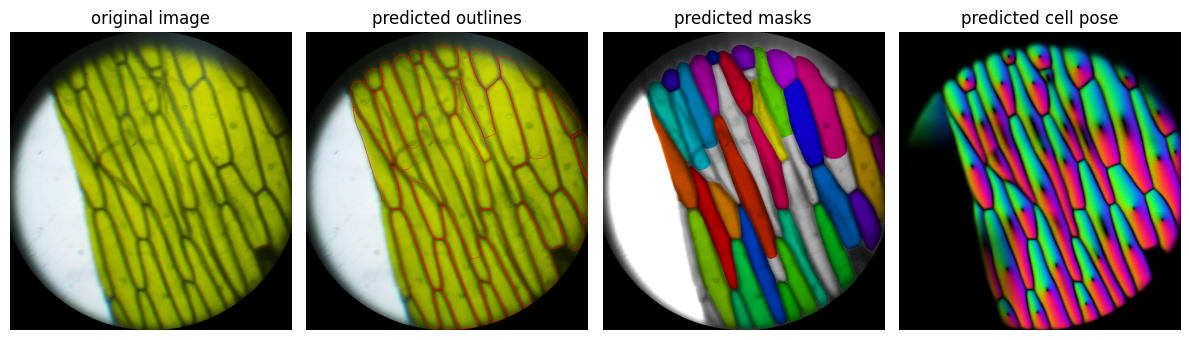

Processing:  11%|█         | 1/9 [00:07<00:56,  7.08s/it]

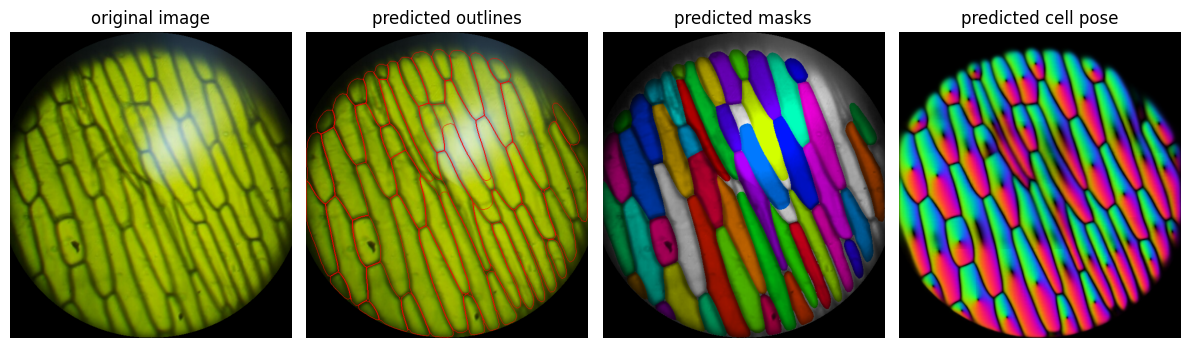

Processing:  22%|██▏       | 2/9 [00:13<00:45,  6.46s/it]

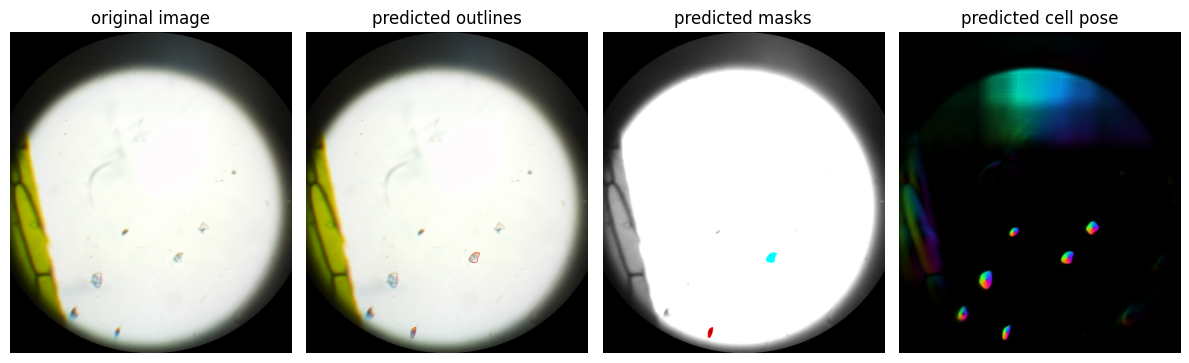

Processing:  33%|███▎      | 3/9 [00:17<00:33,  5.66s/it]

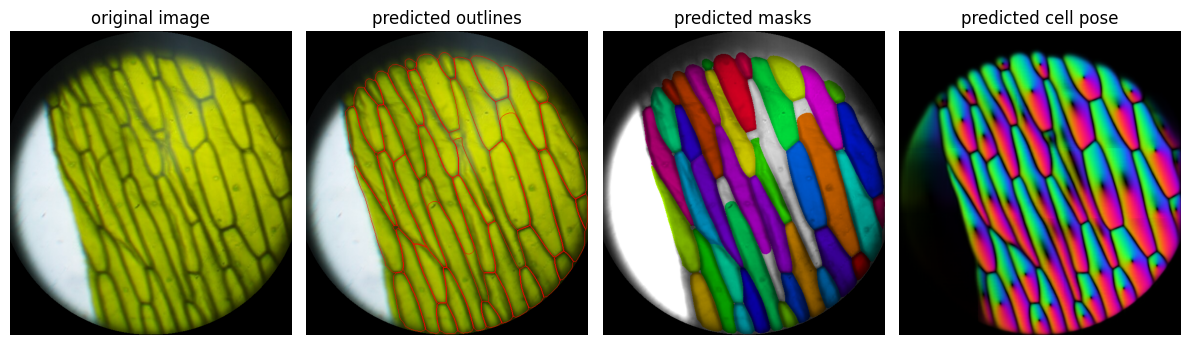

Processing:  44%|████▍     | 4/9 [00:23<00:28,  5.71s/it]

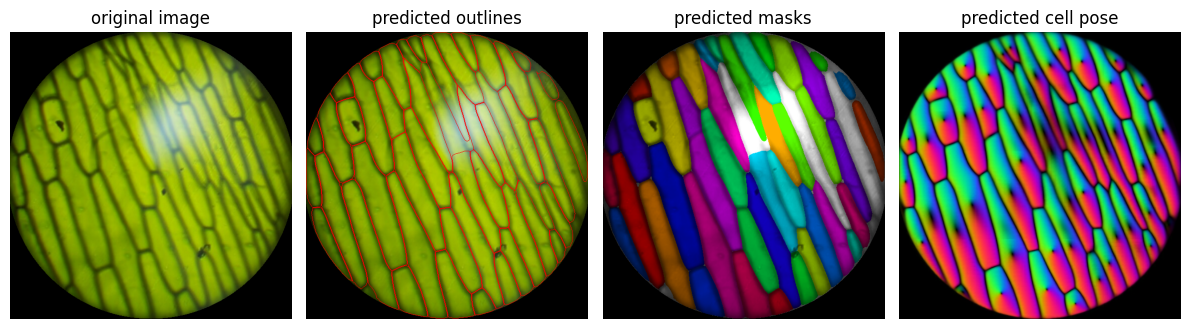

Processing:  56%|█████▌    | 5/9 [00:28<00:22,  5.51s/it]

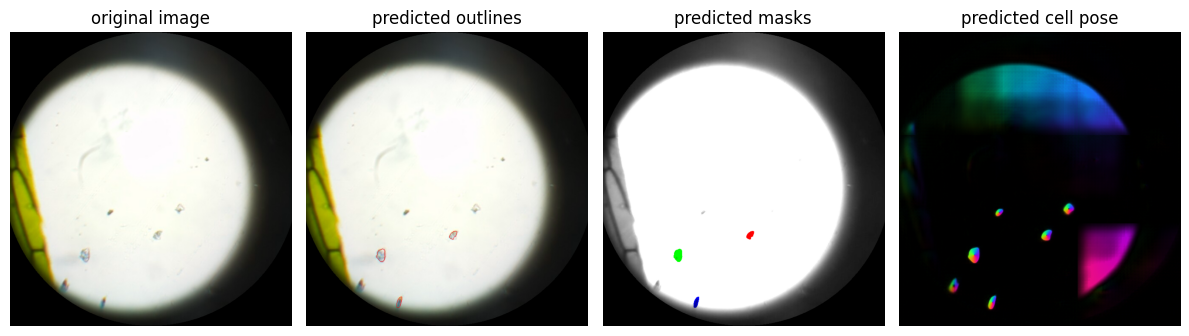

Processing:  67%|██████▋   | 6/9 [00:35<00:17,  5.76s/it]

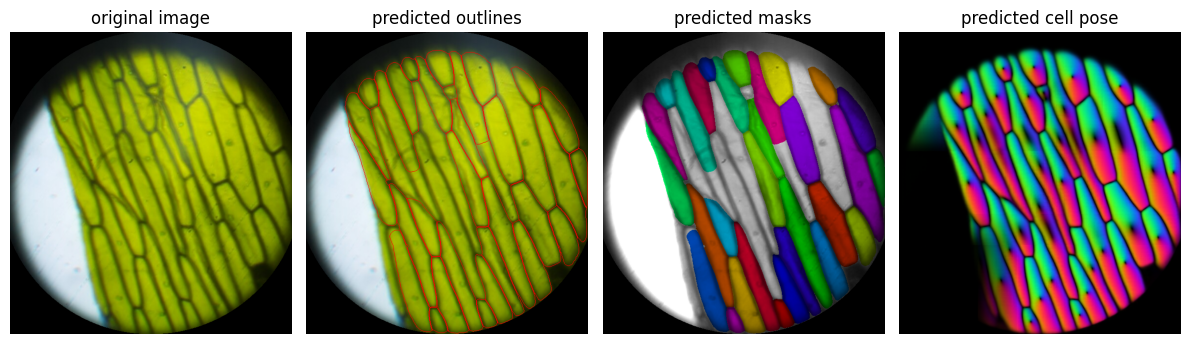

Processing:  78%|███████▊  | 7/9 [00:39<00:10,  5.47s/it]

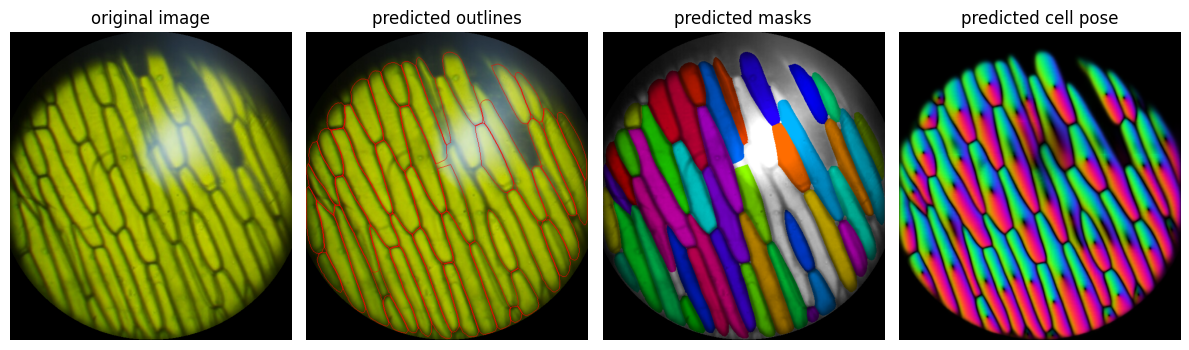

Processing:  89%|████████▉ | 8/9 [00:45<00:05,  5.50s/it]

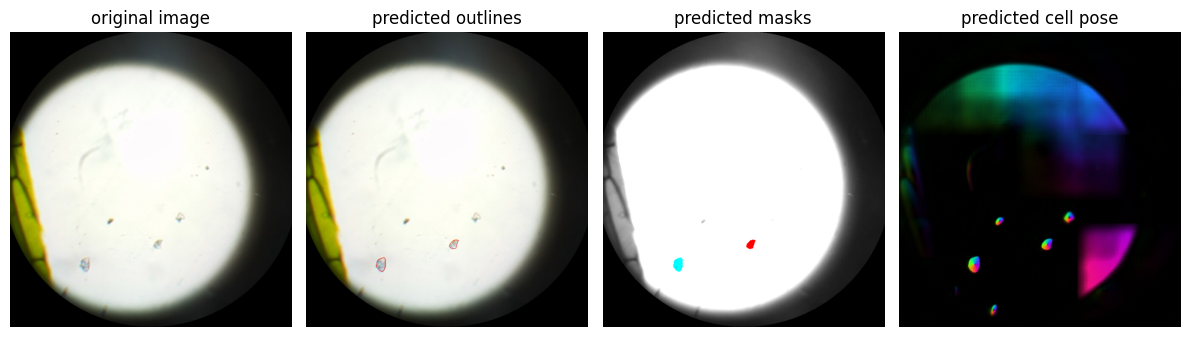

Processing: 100%|██████████| 9/9 [00:51<00:00,  5.75s/it]


In [ ]:
import cellpose, os, cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from cellpose import models, plot
from tqdm import tqdm


# rough cropper
def crop_microscope_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    x,y,w,h = cv2.boundingRect(cv2.threshold(gray,50,255,cv2.THRESH_BINARY)[1])
    crop = image[y:y+h, x:x+w]

    mask = np.zeros(crop.shape[:2], np.uint8)
    radius = max(h,w)//2
    cv2.circle(mask, (w//2, h//2), radius, 255, -1)

    circle = cv2.bitwise_and(crop, crop, mask=mask)
    return circle


if __name__ == "__main__":
  drive.mount('/content/drive', force_remount=True)

  model = models.CellposeModel(gpu=True)

  input_directory  = "/content/drive/MyDrive/MNT/CellposeSAM/Input"
  output_directory = "/content/drive/MyDrive/MNT/CellposeSAM/Output"

  cell_counts = []

  for i, fname in enumerate(tqdm(sorted(os.listdir(input_directory)), desc="Processing"), start=1):
      image_path = os.path.join(input_directory, fname)
      image = crop_microscope_image(image_path)
      masks, flows, styles = model.eval(image)

      # show masks to check if cellpose is working properly
      flowi = flows[0]
      fig = plt.figure(figsize=(12,5))
      plot.show_segmentation(fig, image, masks, flowi)
      plt.tight_layout()
      plt.show()

      cell_count = len(np.unique(masks)) - 1
      cell_counts.append((i, cell_count)) # saves as a tuple (image, cell_count)


  output_path = os.path.join(output_directory, "cell_counts.txt")
  with open(output_path, "w") as f:
      for image, cell_count in cell_counts:
          f.write(f"{image} {cell_count}\n")